In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [99]:
reg_season_compact = pd.read_csv('RegularSeasonCompactResults.csv')
reg_season_detail = pd.read_csv('RegularSeasonDetailedResults.csv')
tourn_compact = pd.read_csv('TourneyCompactResults.csv')
tourn_detail = pd.read_csv('TourneyDetailedResults.csv')

In [134]:
tourn_compact.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [143]:
#dataframe of first round results
first_round = tourn_compact[(tourn_compact['Daynum']==137) | (tourn_compact['Daynum']==136)]

In [142]:
first_round.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [103]:
tourn_detail.head()

,Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot,Wfgm,Wfga,...,Lfga3,Lftm,Lfta,Lor,Ldr,Last,Lto,Lstl,Lblk,Lpf
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


# Create Wins and Loss Tables

In [104]:
#calculate total loses per season
loses_season=reg_season_detail[['Season','Lteam']]
loses_season=loses_season.groupby(['Season','Lteam']).size()
loses_season = loses_season.to_frame(name = 'size').reset_index()
loses_season.columns=['Season','Lteam','Total_Loses']
loses_season

,Season,Lteam,Total_Loses
0,2003,1102,16
1,2003,1103,14
2,2003,1104,11
3,2003,1105,19
4,2003,1106,15
5,2003,1107,21
6,2003,1108,19
7,2003,1110,14
8,2003,1111,10
9,2003,1112,3


In [105]:
#calculate total wins per season
wins_season=reg_season_detail[['Season','Wteam']]
wins_season=wins_season.groupby(['Season','Wteam']).size()
wins_season = wins_season.to_frame(name = 'size').reset_index()
wins_season.columns=['Season','Wteam','Total_Wins']
wins_season

,Season,Wteam,Total_Wins
0,2003,1102,12
1,2003,1103,13
2,2003,1104,17
3,2003,1105,7
4,2003,1106,13
5,2003,1107,7
6,2003,1108,14
7,2003,1110,16
8,2003,1111,16
9,2003,1112,25


# Win-Loss Record

In [106]:
#record per season
win_loss_record = pd.merge(loses_season, wins_season,  how='outer', left_on=['Season','Lteam'], right_on = ['Season','Wteam'])


In [107]:
win_loss_record.Total_Wins.max()

34.0

# Winning Team Aggregate Stats

In [119]:
#Winning Team Aggregate Stats
wteam_agg=reg_season_detail.groupby(['Season','Wteam']).agg({'Wscore':'sum', 'Wfgm':'sum', 'Wfga':'sum'
                                                            ,'Wfgm3':'sum','Wfga3':'sum','Wftm':'sum',
                                                            'Wftm':'sum','Wfta':'sum','Wor':'sum','Wdr':'sum',
                                                             'Wast':'sum','Wstl':'sum',
                                                            'Wblk':'sum','Wto':'sum',
                                                            'Wpf':'sum'}).reset_index()
print (wteam_agg)

      Season  Wteam  Wscore  Wfgm  Wfga  Wfgm3  Wfga3  Wftm  Wfta  Wor  Wdr  \
0       2003   1102     825   271   480    120    259   163   249   46  232   
1       2003   1103    1141   390   720     71    187   290   402  122  279   
2       2003   1104    1270   439   992    120    354   272   383  230  449   
3       2003   1105     556   179   433     64    157   134   180  102  181   
4       2003   1106     888   322   700     76    207   168   270  166  364   
5       2003   1107     492   175   390     56    147    86   111   61  175   
6       2003   1108    1050   365   789     82    212   238   338  164  347   
7       2003   1110    1147   396   840    156    356   199   299  156  384   
8       2003   1111    1410   481  1001    127    320   321   443  194  455   
9       2003   1112    2155   766  1621    177    481   446   632  371  704   
10      2003   1113    1453   523  1007     64    199   343   506  252  454   
11      2003   1114    1150   371   770    121    27

# Losing Team Aggregate Stats 

In [120]:
#Losing Team Aggregate Stats
lteam_agg=reg_season_detail.groupby(['Season','Lteam']).agg({'Lscore':'sum', 'Lfgm':'sum', 'Lfga':'sum'
                                                            ,'Lfgm3':'sum','Lfga3':'sum','Lftm':'sum',
                                                            'Lftm':'sum','Lfta':'sum','Lor':'sum','Ldr':'sum',
                                                             'Last':'sum','Lstl':'sum',
                                                            'Lblk':'sum','Lto':'sum',
                                                            'Lpf':'sum'}).reset_index()
print (lteam_agg)

      Season  Lteam  Lscore  Lfgm  Lfga  Lfgm3  Lfga3  Lftm  Lfta  Lor  Ldr  \
0       2003   1102     778   265   634     99    324   149   230   71  239   
1       2003   1103     986   343   788     76    247   224   296  142  259   
2       2003   1104     670   234   609     58    202   144   203  150  221   
3       2003   1105    1310   455  1169    133    383   267   388  249  420   
4       2003   1106     893   334   848     95    287   130   191  178  304   
5       2003   1107    1354   498  1219    166    474   192   268  170  392   
6       2003   1108    1230   458  1149     90    327   224   353  269  419   
7       2003   1110     844   299   766    107    338   139   197  144  310   
8       2003   1111     755   263   676     60    251   169   238  144  203   
9       2003   1112     231    83   219     20     81    45    68   54   70   
10      2003   1113     750   266   643     52    166   166   254  145  222   
11      2003   1114     811   297   720     69    24

In [122]:
#Combined Stats
combined_stats = pd.merge(lteam_agg, wteam_agg,  how='outer', left_on=['Season','Lteam'], right_on = ['Season','Wteam'])
combined_stats['Tfga'] = combined_stats['Wfga']+combined_stats['Lfga']
combined_stats['Tfgm'] = combined_stats['Wfgm']+combined_stats['Lfgm']
combined_stats['Tfga3'] = combined_stats['Wfga3']+combined_stats['Lfga3']
combined_stats['Tfgm3'] = combined_stats['Wfgm3']+combined_stats['Lfgm3']

combined_stats['Tfta'] = combined_stats['Wfta']+combined_stats['Lfta']
combined_stats['Tftm'] = combined_stats['Wftm']+combined_stats['Lftm']

combined_stats['Tor'] = combined_stats['Wor']+combined_stats['Lor']
combined_stats['Tdr'] = combined_stats['Wdr']+combined_stats['Ldr']
combined_stats['Tast'] = combined_stats['Wast']+combined_stats['Last']
combined_stats['Tstl'] = combined_stats['Wstl']+combined_stats['Lstl']

combined_stats['Tpf'] = combined_stats['Wpf']+combined_stats['Lpf']
combined_stats['Tto'] = combined_stats['Wstl']+combined_stats['Lto']
combined_stats['Tblk'] = combined_stats['Wblk']+combined_stats['Lblk']
combined_stats.head()


,Season,Lteam,Lscore,Lfgm,Lfga,Lfgm3,Lfga3,Lftm,Lfta,Lor,...,Tfgm3,Tfta,Tftm,Tor,Tdr,Tast,Tstl,Tpf,Tto,Tblk
0,2003,1102.0,778.0,265.0,634.0,99.0,324.0,149.0,230.0,71.0,...,219.0,479.0,312.0,117.0,471.0,364.0,167.0,525.0,275.0,50.0
1,2003,1103.0,986.0,343.0,788.0,76.0,247.0,224.0,296.0,142.0,...,147.0,698.0,514.0,264.0,538.0,411.0,196.0,536.0,273.0,63.0
2,2003,1104.0,670.0,234.0,609.0,58.0,202.0,144.0,203.0,150.0,...,178.0,586.0,416.0,380.0,670.0,339.0,185.0,505.0,273.0,106.0
3,2003,1105.0,1310.0,455.0,1169.0,133.0,383.0,267.0,388.0,249.0,...,197.0,568.0,401.0,351.0,601.0,378.0,242.0,526.0,438.0,54.0
4,2003,1106.0,893.0,334.0,848.0,95.0,287.0,130.0,191.0,178.0,...,171.0,461.0,298.0,344.0,668.0,327.0,234.0,509.0,369.0,88.0


In [125]:
combined_stats.columns

Index(['Season', 'Lteam', 'Lscore', 'Lfgm', 'Lfga', 'Lfgm3', 'Lfga3', 'Lftm',
       'Lfta', 'Lor', 'Ldr', 'Last', 'Lstl', 'Lblk', 'Lto', 'Lpf', 'Wteam',
       'Wscore', 'Wfgm', 'Wfga', 'Wfgm3', 'Wfga3', 'Wftm', 'Wfta', 'Wor',
       'Wdr', 'Wast', 'Wstl', 'Wblk', 'Wto', 'Wpf', 'Tfga', 'Tfgm', 'Tfga3',
       'Tfgm3', 'Tfta', 'Tftm', 'Tor', 'Tdr', 'Tast', 'Tstl', 'Tpf', 'Tto',
       'Tblk'],
      dtype='object')

In [149]:
all_stats = pd.merge(combined_stats, win_loss_record,  how='outer', left_on=['Season','Lteam'], right_on = ['Season','Wteam'])
#total stats 
total_stats=all_stats.filter(items=['Season','Lteam_x','Tfga', 'Tfgm', 'Tfga3',
       'Tfgm3', 'Tfta', 'Tftm', 'Tor', 'Tdr', 'Tast', 'Tstl', 'Tpf', 'Tto',
       'Tblk','Total_Wins','Total_Loses'])
total_stats.head()

,Season,Lteam_x,Tfga,Tfgm,Tfga3,Tfgm3,Tfta,Tftm,Tor,Tdr,Tast,Tstl,Tpf,Tto,Tblk,Total_Wins,Total_Loses
0,2003,1102.0,1114.0,536.0,583.0,219.0,479.0,312.0,117.0,471.0,364.0,167.0,525.0,275.0,50.0,12.0,16.0
1,2003,1103.0,1508.0,733.0,434.0,147.0,698.0,514.0,264.0,538.0,411.0,196.0,536.0,273.0,63.0,13.0,14.0
2,2003,1104.0,1601.0,673.0,556.0,178.0,586.0,416.0,380.0,670.0,339.0,185.0,505.0,273.0,106.0,17.0,11.0
3,2003,1105.0,1602.0,634.0,540.0,197.0,568.0,401.0,351.0,601.0,378.0,242.0,526.0,438.0,54.0,7.0,19.0
4,2003,1106.0,1548.0,656.0,494.0,171.0,461.0,298.0,344.0,668.0,327.0,234.0,509.0,369.0,88.0,13.0,15.0


In [160]:
#winning team first round
total_stats_win_first_round=pd.merge(total_stats, first_round,  how='inner', left_on=['Season','Lteam_x'], right_on = ['Season','Wteam'])
#losing team first round
total_stats_loss_first_round=pd.merge(total_stats, first_round,  how='inner', left_on=['Season','Lteam_x'], right_on = ['Season','Lteam'])

# Visualizations

# Field Goal Percentage

In [ ]:
# confirm or deny some hypotheses, use them as a way to gain insights into next steps. 
# come up with more questions to solve
# skewed ditributions, keep an eye for out
# boxplot, scatter, histogram, time series - googling data visualizations
# career - knowing linear and logistic are extremely important 

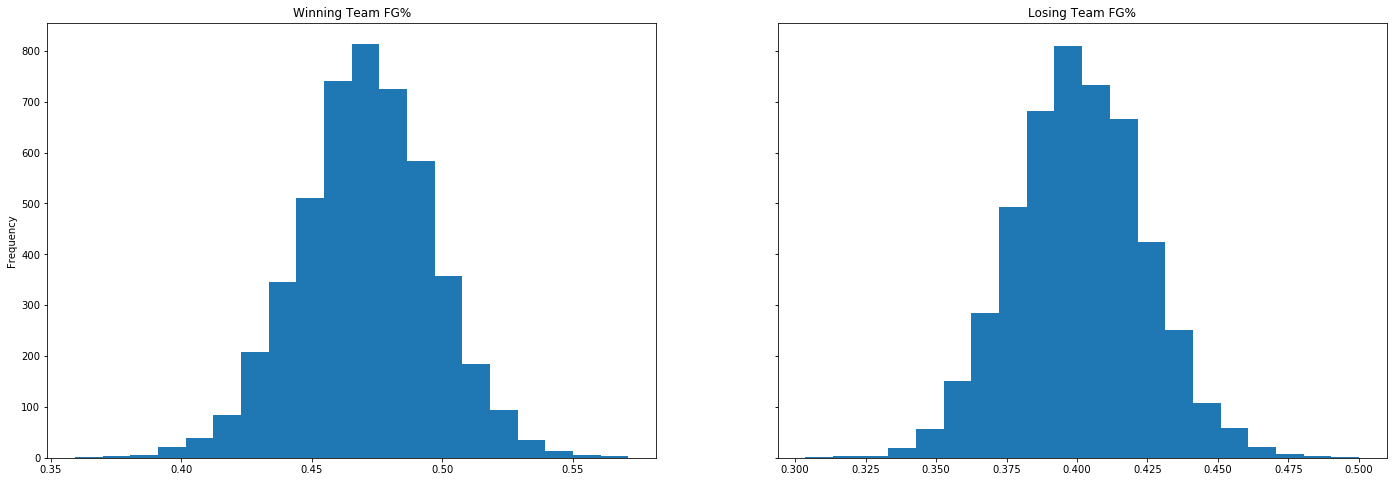

In [85]:
#FG % Winning vs Losing teams
wfgp=wteam_agg.Wfgm/wteam_agg.Wfga
lfgp=lteam_agg.Lfgm/lteam_agg.Lfga

fig, axs = plt.subplots(1, 2, sharey=True)
wfgp.plot(kind='hist', ax=axs[0], title='Winning Team FG%',bins=20,figsize=(24, 8))
lfgp.plot(kind='hist', ax=axs[1], title='Losing Team FG%',bins=20)


# 3 PT FG %

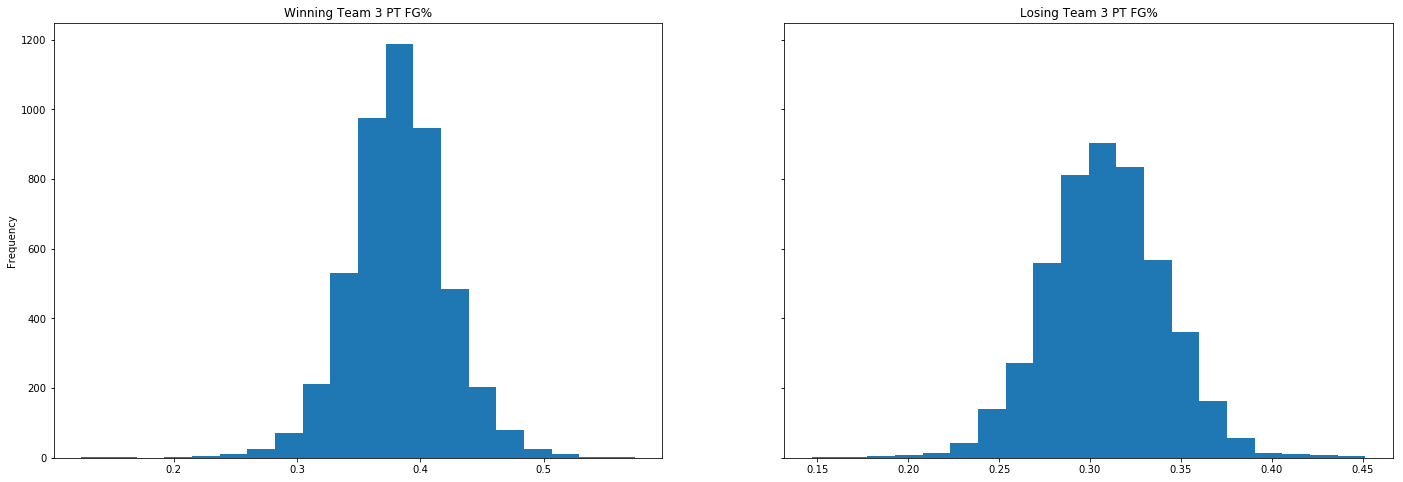

In [84]:
#3P FG % Winning vs Losing teams

wfgp3=wteam_agg.Wfgm3/wteam_agg.Wfga3
lfgp3=lteam_agg.Lfgm3/lteam_agg.Lfga3

fig, axs = plt.subplots(1, 2, sharey=True)
wfgp3.plot(kind='hist', ax=axs[0], title='Winning Team 3 PT FG%',bins=20,figsize=(24, 8))
lfgp3.plot(kind='hist', ax=axs[1], title='Losing Team 3 PT FG%',bins=20)

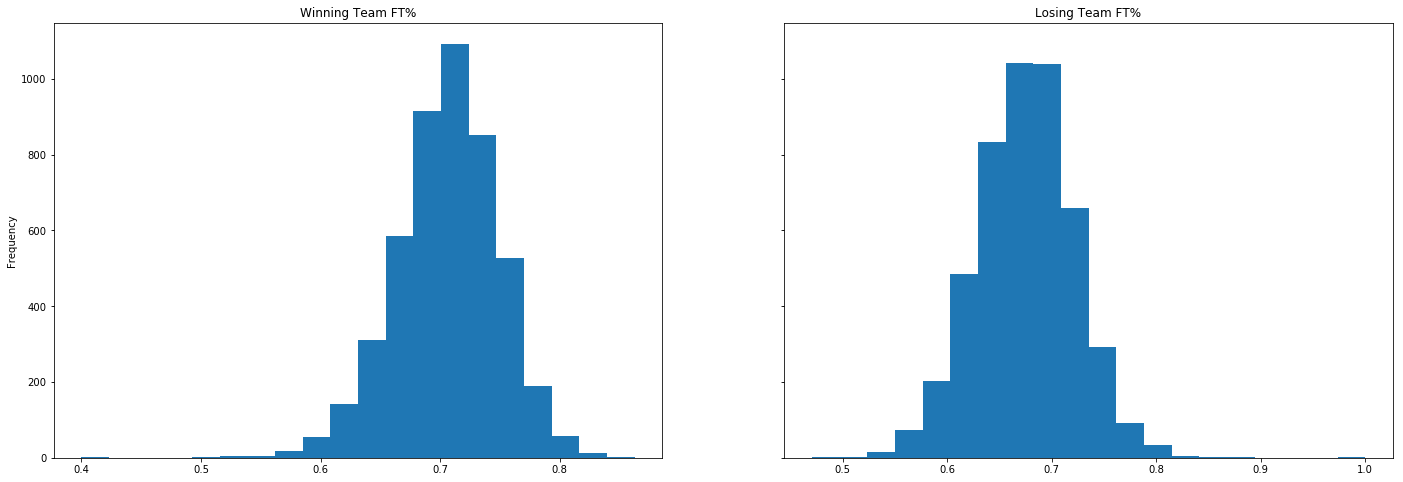

In [83]:
#FT% Winning vs Losing teams

wft=wteam_agg.Wftm/wteam_agg.Wfta
lft=lteam_agg.Lftm/lteam_agg.Lfta

fig, axs = plt.subplots(1, 2, sharey=True)
wft.plot(kind='hist', ax=axs[0], title='Winning Team FT%',bins=20,figsize=(24, 8))
lft.plot(kind='hist', ax=axs[1], title='Losing Team FT%',bins=20)

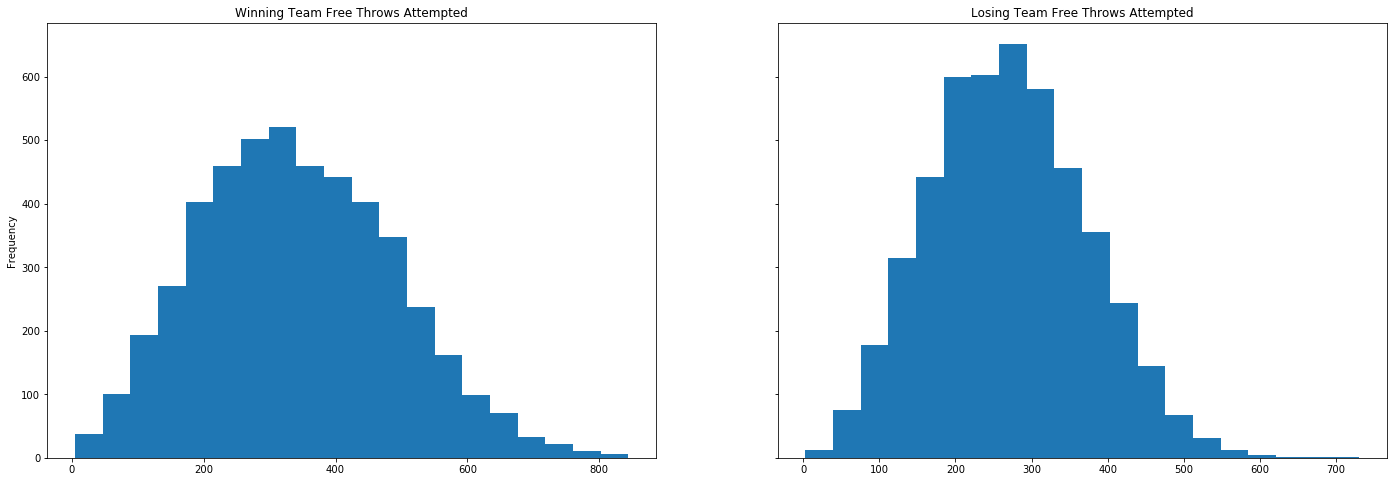

In [82]:
#FTA Winning vs Losing teams

wfta=wteam_agg.Wfta
lfta=lteam_agg.Lfta

fig, axs = plt.subplots(1, 2, sharey=True)
wfta.plot(kind='hist', ax=axs[0], title='Winning Team Free Throws Attempted',bins=20,figsize=(24, 8))
lfta.plot(kind='hist', ax=axs[1], title='Losing Team Free Throws Attempted', bins=20)

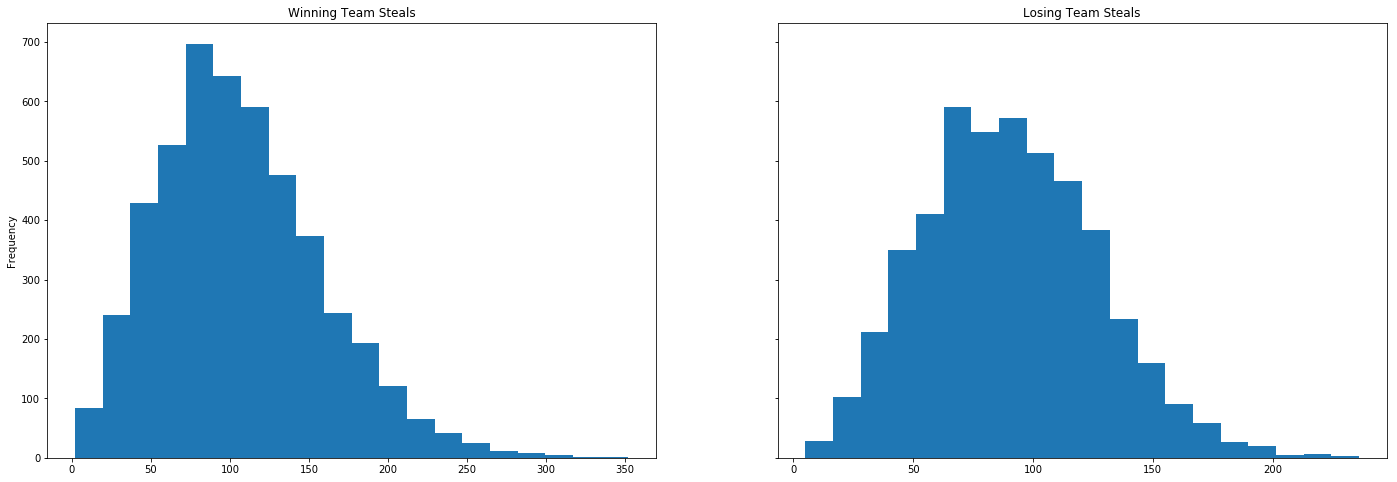

In [87]:
#STLS Winning vs Losing teams

wstl=wteam_agg.Wstl
lstl=lteam_agg.Lstl

fig, axs = plt.subplots(1, 2, sharey=True)
wstl.plot(kind='hist', ax=axs[0], title='Winning Team Steals',bins=20,figsize=(24, 8))
lstl.plot(kind='hist', ax=axs[1], title='Losing Team Steals', bins=20)

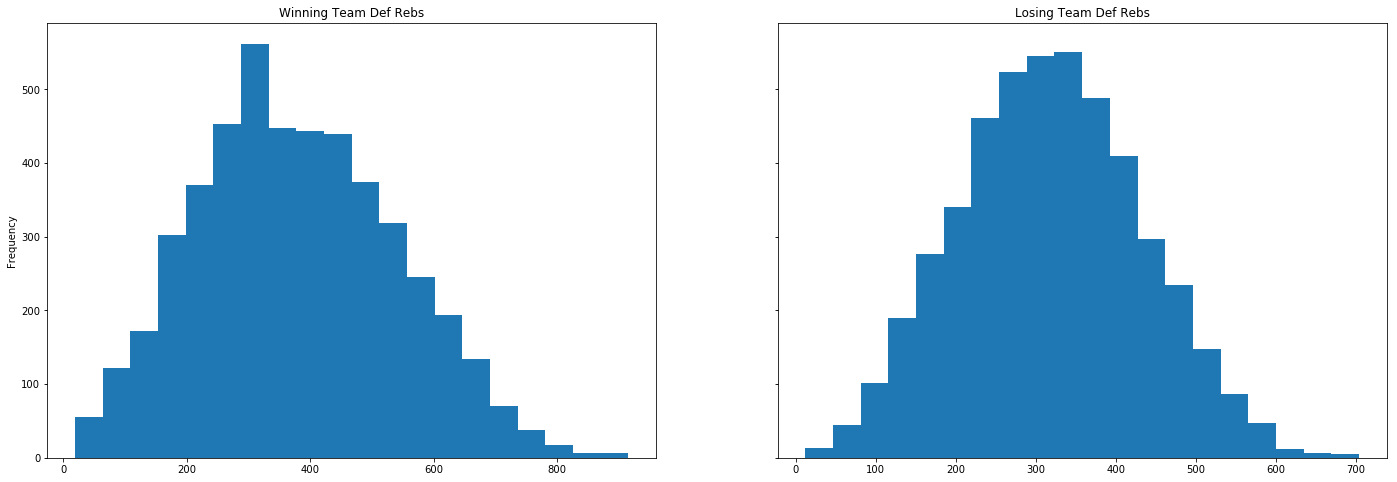

In [88]:
#DRB Winning vs Losing teams

wdr=wteam_agg.Wdr
ldr=lteam_agg.Ldr

fig, axs = plt.subplots(1, 2, sharey=True)
wdr.plot(kind='hist', ax=axs[0], title='Winning Team Def Rebs',bins=20,figsize=(24, 8))
ldr.plot(kind='hist', ax=axs[1], title='Losing Team Def Rebs', bins=20)

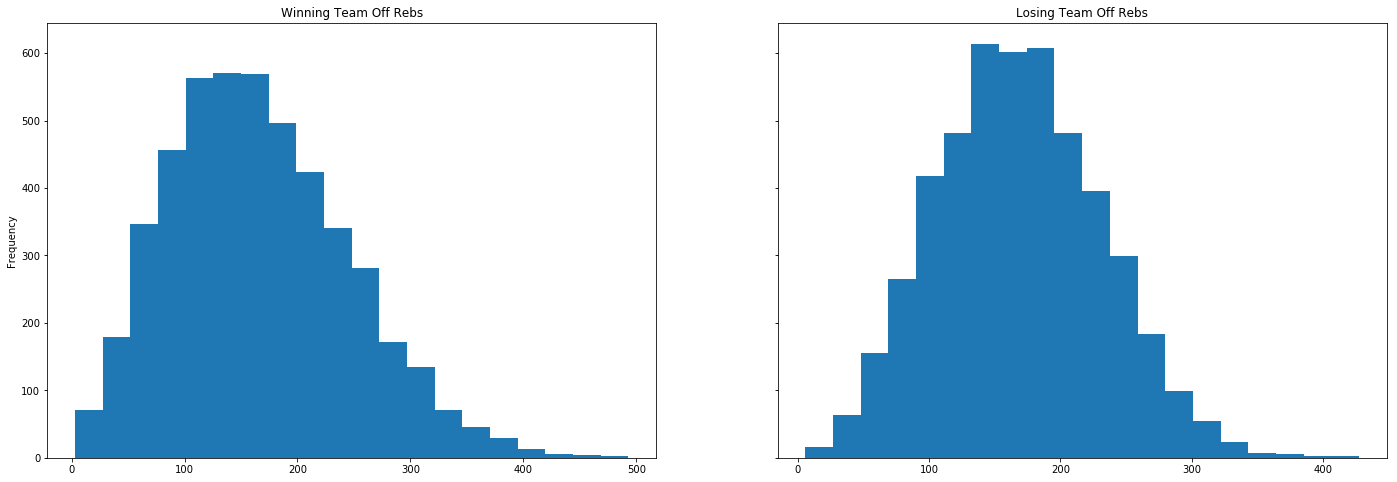

In [176]:
#ORB Winning vs Losing teams

wor=wteam_agg.Wor
lor=lteam_agg.Lor

fig, axs = plt.subplots(1, 2, sharey=True)
wor.plot(kind='hist', ax=axs[0], title='Winning Team Off Rebs',bins=20,figsize=(24, 8))
lor.plot(kind='hist', ax=axs[1], title='Losing Team Off Rebs', bins=20)

Visualizations by tournament results

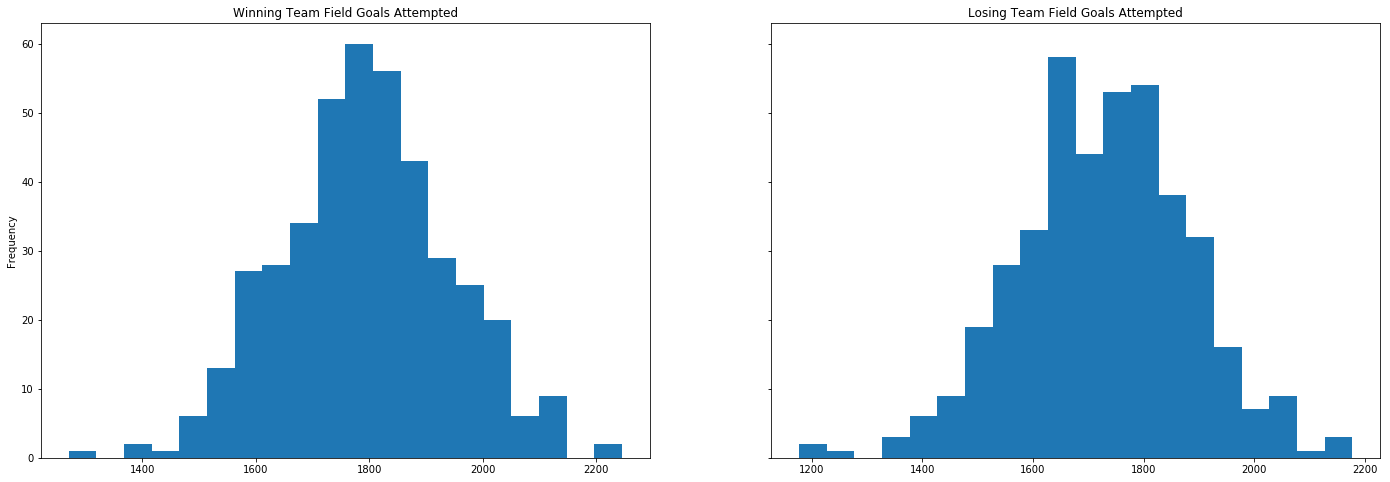

In [163]:
#FG % Winning vs Losing teams
loss_fga=total_stats_loss_first_round.Tfga
win_fga=total_stats_win_first_round.Tfga

fig, axs = plt.subplots(1, 2, sharey=True)
win_fga.plot(kind='hist', ax=axs[0], title='Winning Team Field Goals Attempted',bins=20,figsize=(24, 8))
loss_fga.plot(kind='hist', ax=axs[1], title='Losing Team Field Goals Attempted',bins=20)


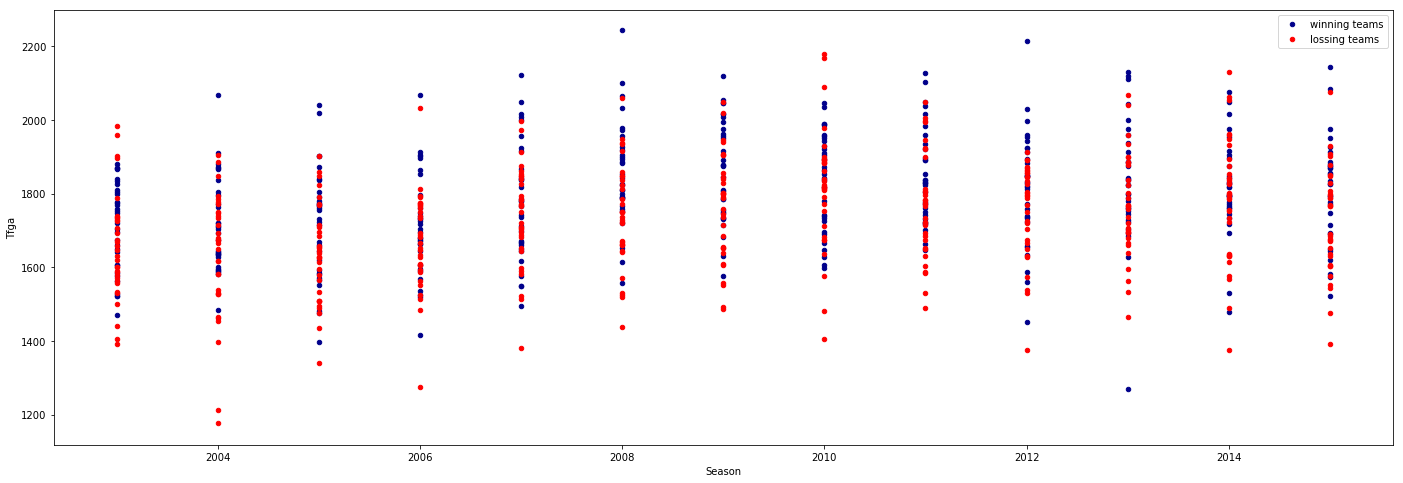

In [208]:
#field goal attempts

ax=total_stats_win_first_round.plot.scatter(x='Season', y='Tfga', color='DarkBlue',figsize=(24, 8), label='winning teams')
total_stats_loss_first_round.plot.scatter(x='Season', y='Tfga', ax=ax,color='Red', label='lossing teams')


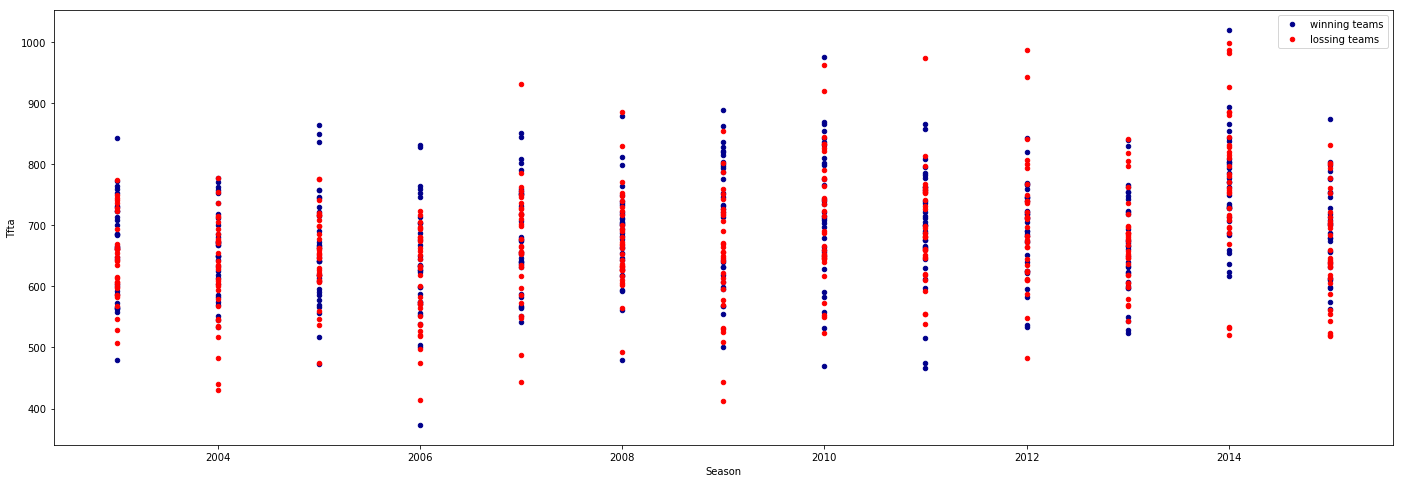

In [207]:
#Free Throw attempts
ax=total_stats_win_first_round.plot.scatter(x='Season', y='Tfta', color='DarkBlue',figsize=(24, 8), label='winning teams')
total_stats_loss_first_round.plot.scatter(x='Season', y='Tfta', ax=ax,color='Red', label='lossing teams')

TypeError: boxplot() got an unexpected keyword argument 'column'

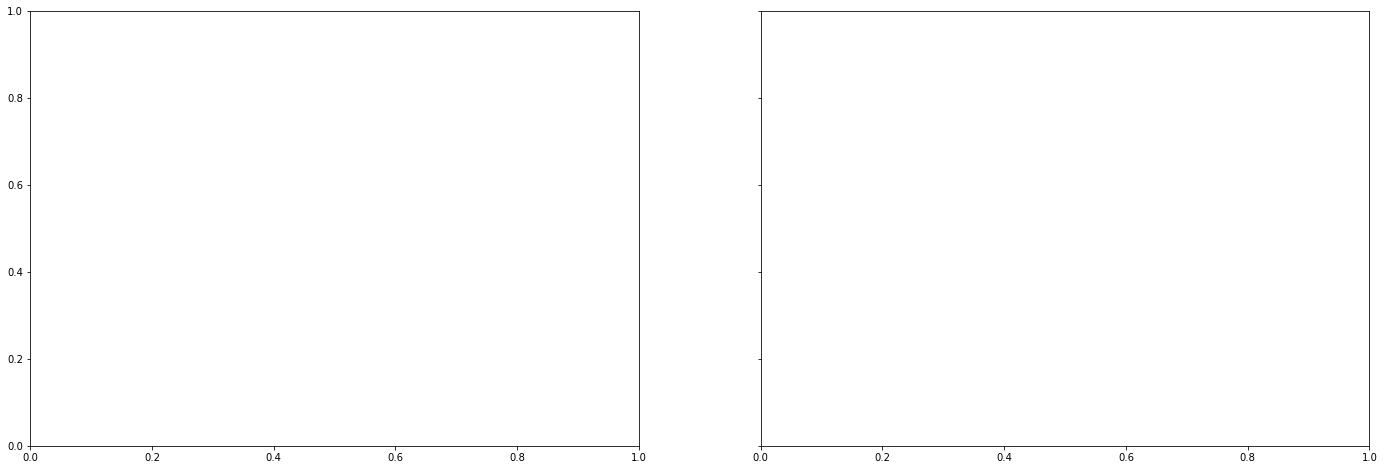

In [218]:
#Free Throw attempts
fig, axs = plt.subplots(1, 2, sharey=True)
total_stats_win_first_round.plot.box( column='Tfta',by='Season',color='DarkBlue', label='winning teams',ax=axs[0],figsize=(24, 8))
total_stats_loss_first_round.plot.box(column='Tfta',by='Season', color='DarkBlue', label='losing teams',ax=axs[1],figsize=(24, 8))
